In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd /Users/rogerdefez/Documents/Curso IBM - IA/Recursos descargados

/Users/rogerdefez/Documents/Curso IBM - IA/Recursos descargados


In [3]:
ls

1.- Que hace la IA.docx
Inteligencia artificial frente a inteligencia aumentada.pdf
Seccion_6_Tarea_Datos.numbers*
train.csv


In [4]:
entrenamiento = pd.read_csv ('train.csv')

In [5]:
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

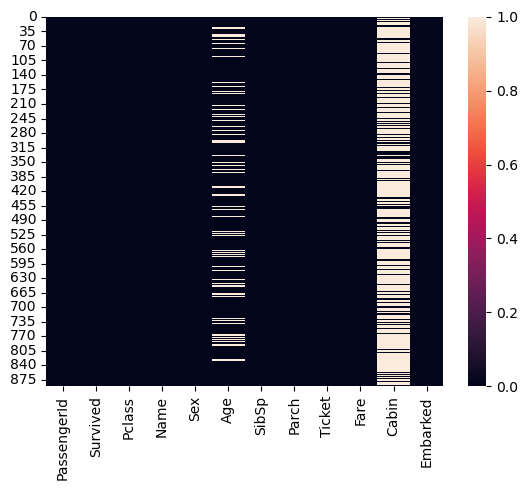

In [6]:
sns.heatmap(entrenamiento.isnull())

In [7]:
import cufflinks as cf
cf.go_offline()

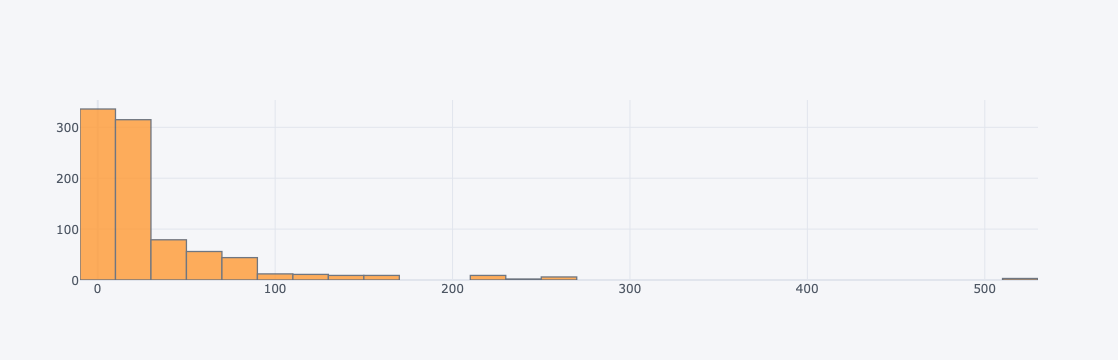

In [8]:
entrenamiento['Fare'].iplot(kind='hist', bins=40)

<Axes: xlabel='Pclass', ylabel='Age'>

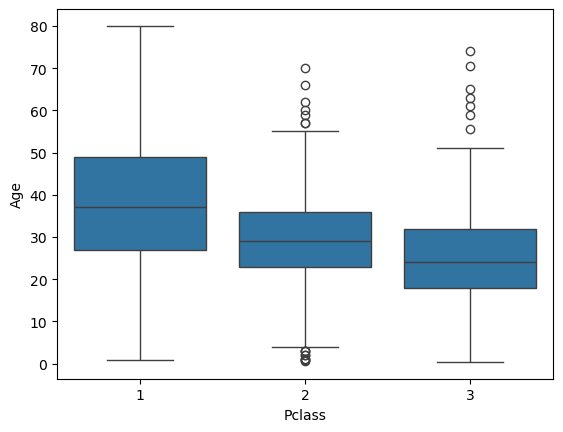

In [9]:
sns.boxplot(x='Pclass', y='Age', data=entrenamiento)

In [10]:
def edad_media(columnas):
    edad = columnas[0]
    clase = columnas[1]
    if pd.isnull(edad):
        if clase == 1:
            return 38
        elif clase ==2:
            return 30
        else:
            return 25
    else: 
        return edad

In [11]:
entrenamiento['Age'] = entrenamiento[['Age', 'Pclass']].apply(edad_media, axis=1)

/var/folders/6f/lhr87vh51bq38sm9v46389m00000gn/T/ipykernel_30076/436246872.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/6f/lhr87vh51bq38sm9v46389m00000gn/T/ipykernel_30076/436246872.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

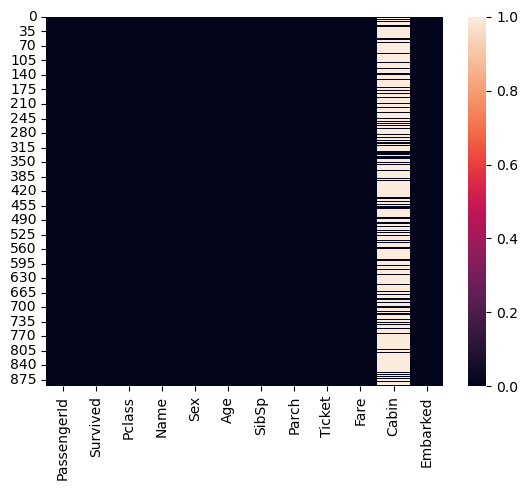

In [12]:
sns.heatmap(entrenamiento.isnull())

In [13]:
entrenamiento.drop('Cabin', axis=1,inplace=True)

<Axes: >

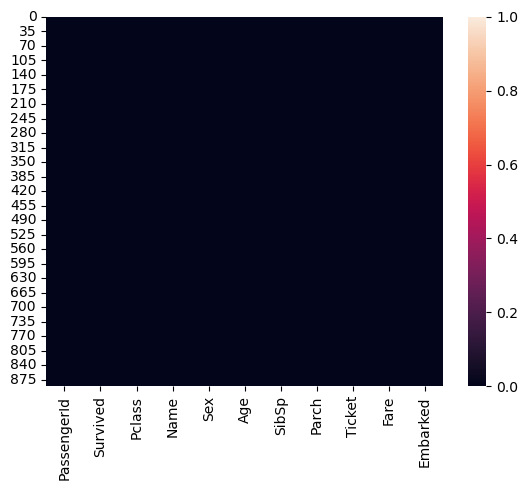

In [14]:
sns.heatmap(entrenamiento.isnull())

In [15]:
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
entrenamiento.drop(['Name', 'Ticket', 'PassengerId'] ,axis=1,inplace=True)

In [17]:
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
sexo = pd.get_dummies(entrenamiento['Sex'], drop_first=True)

In [19]:
entrenamiento = pd.concat ([entrenamiento, sexo], axis=1) 

In [20]:
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,22.0,1,0,7.2500,S,True
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,False
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [21]:
entrenamiento.drop('Sex' ,axis=1,inplace=True)

In [22]:
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,True
1,1,1,38.0,1,0,71.2833,C,False
2,1,3,26.0,0,0,7.9250,S,False
3,1,1,35.0,1,0,53.1000,S,False
4,0,3,35.0,0,0,8.0500,S,True


In [23]:
puerto = pd.get_dummies(entrenamiento['Embarked'], drop_first=True)

In [24]:
puerto

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [25]:
entrenamiento = pd.concat ([entrenamiento, puerto], axis=1) 

In [26]:
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,True,False,True
1,1,1,38.0,1,0,71.2833,C,False,False,False
2,1,3,26.0,0,0,7.9250,S,False,False,True
3,1,1,35.0,1,0,53.1000,S,False,False,True
4,0,3,35.0,0,0,8.0500,S,True,False,True


In [27]:
# Convertir todas las columnas booleanas a enteros (0/1)
for col in entrenamiento.select_dtypes(include='bool').columns:
    entrenamiento[col] = entrenamiento[col].astype(int)

print(entrenamiento)

     Survived  Pclass   Age  SibSp  Parch     Fare Embarked  male  Q  S
0           0       3  22.0      1      0   7.2500        S     1  0  1
1           1       1  38.0      1      0  71.2833        C     0  0  0
2           1       3  26.0      0      0   7.9250        S     0  0  1
3           1       1  35.0      1      0  53.1000        S     0  0  1
4           0       3  35.0      0      0   8.0500        S     1  0  1
..        ...     ...   ...    ...    ...      ...      ...   ... .. ..
886         0       2  27.0      0      0  13.0000        S     1  0  1
887         1       1  19.0      0      0  30.0000        S     0  0  1
888         0       3  25.0      1      2  23.4500        S     0  0  1
889         1       1  26.0      0      0  30.0000        C     1  0  0
890         0       3  32.0      0      0   7.7500        Q     1  1  0

[891 rows x 10 columns]


In [28]:
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1


In [29]:
entrenamiento.drop('Embarked' ,axis=1,inplace=True)

In [30]:
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Entenamiento del modelo

In [32]:
y = entrenamiento['Survived']
X = entrenamiento.drop('Survived', axis=1)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=45)

In [34]:
X_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
248,1,37.0,1,1,52.5542,1,0,1
197,3,42.0,0,1,8.4042,1,0,1
133,2,29.0,1,0,26.0000,0,0,1
169,3,28.0,0,0,56.4958,1,0,1
736,3,48.0,1,3,34.3750,0,0,1
...,...,...,...,...,...,...,...,...
422,3,29.0,0,0,7.8750,1,0,1
815,1,38.0,0,0,0.0000,1,0,1
466,2,30.0,0,0,0.0000,1,0,1
559,3,36.0,1,0,17.4000,0,0,1


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [78]:
predicciones = modelo.predict(X_test)

In [80]:
predicciones

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0])

In [82]:
y_test

248    1
197    0
133    1
169    0
736    0
      ..
422    0
815    0
466    0
559    1
6      0
Name: Survived, Length: 268, dtype: int64

In [84]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       178
           1       0.73      0.77      0.75        90

    accuracy                           0.83       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test,predicciones)

array([[153,  25],
       [ 21,  69]])

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Función de regresión logística
def regresion_logistica(datos):
    y = datos['Enfermedad']
    X = datos[['Edad', 'Colesterol']]
    from sklearn.model_selection import train_test_split
    modelo = LogisticRegression()
    modelo.fit(X, y)
   
    return modelo

In [8]:
# Ejemplo de uso con datos de pacientes
data = {'Edad': [50, 35, 65, 28, 60], 'Colesterol': [180, 150, 210, 130, 190], 'Enfermedad': [1, 0, 1, 0, 1]}

df = pd.DataFrame(data)		
modelo_regresion_logistica = regresion_logistica(df)

# Estimaciones de clasificación binaria para nuevos datos
nuevos_datos = pd.DataFrame({'Edad': [45, 55], 'Colesterol': [170, 200]})
estimaciones_clasificacion = modelo_regresion_logistica.predict(nuevos_datos)
print("Estimaciones de Clasificación:")
print(estimaciones_clasificacion)

Estimaciones de Clasificación:
[1 1]


datos


In [114]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

def regresion_logistica(datos):
    # Dividir los datos en características (X) y variable objetivo (y)
    X = datos[['Edad', 'Colesterol']]
    y = datos['Enfermedad']
    
    # Crear un modelo de regresión logística
    modelo = LogisticRegression()
    
    # Ajustar el modelo a los datos
    modelo.fit(X, y)
    
    return modelo

# Ejemplo de uso con datos de pacientes
data = {
    'Edad': [50, 35, 65, 28, 60],
    'Colesterol': [180, 150, 210, 130, 190],
    'Enfermedad': [1, 0, 1, 0, 1]
}
 
df = pd.DataFrame(data)
modelo_regresion_logistica = regresion_logistica(df)
 
# Estimaciones de clasificación binaria para nuevos datos
nuevos_datos = pd.DataFrame({'Edad': [45, 55], 'Colesterol': [170, 200]})
estimaciones_clasificacion = modelo_regresion_logistica.predict(nuevos_datos)
print("Estimaciones de Clasificación:")
print(estimaciones_clasificacion)


Estimaciones de Clasificación:
[1 1]
